In [57]:
# https://www.kaggle.com/gpreda/santander-eda-and-prediction
# used for inspiration

In [32]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

In [47]:
train = pd.read_csv("Santander_customer_classification/train_small.csv")

In [48]:
test = pd.read_csv("Santander_customer_classification/test_small.csv")

In [4]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
2,train_7,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,5.0647,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
3,train_12,8.7671,-4.6154,9.7242,7.4242,9.0254,1.4247,6.2815,12.3143,5.6964,...,0.3782,7.4382,0.0854,1.3444,17.2439,-0.0798,5.7389,8.4897,17.0938,4.6106
4,train_14,13.8080,5.0514,17.2611,8.5120,12.8517,-9.1622,5.7327,21.0517,-4.5117,...,1.0740,8.3220,3.2619,1.6738,17.4797,-0.0257,-3.5323,9.3439,24.4479,-5.1110


In [5]:
train.head()

,ID_code,c,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
1,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
2,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
3,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
4,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097


In [6]:
train.describe()

,c,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,...,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000
mean,0.099733,10.678757,-1.625370,10.718501,6.801363,11.080280,-5.099666,5.412131,16.557562,0.284365,...,3.257023,7.444208,1.927193,3.328773,18.008622,-0.140578,2.298631,8.906114,15.869843,-3.323176
std,0.299646,3.037911,4.060012,2.629766,2.043351,1.627265,7.887190,0.867160,3.422813,3.335973,...,4.540336,3.018182,1.481911,3.988392,3.138089,1.427751,5.460012,0.920043,3.014017,10.438217
min,0.000000,0.597900,-15.043400,2.615000,-0.040200,5.490200,-29.777300,2.347300,5.349700,-9.905100,...,-13.999500,-2.009400,-3.566800,-11.783400,9.594900,-4.644200,-14.020400,5.960600,6.299300,-38.852800
25%,0.000000,8.461000,-4.751700,8.742600,5.252000,9.877400,-11.271800,4.768100,13.951300,-2.335100,...,-0.022800,5.161900,0.886300,0.587800,15.640500,-1.164000,-1.956100,8.253600,13.819700,-11.236200
50%,0.000000,10.526500,-1.614100,10.589100,6.837700,11.113000,-4.844100,5.387400,16.464600,0.409100,...,3.231400,7.341700,1.899100,3.387100,17.975900,-0.169000,2.390700,8.886000,15.931700,-2.800100
75%,0.000000,12.749600,1.371600,12.505900,8.333400,12.268000,0.907600,6.005500,19.119800,2.946300,...,6.410200,9.529300,2.952300,6.206400,20.421000,0.828300,6.573400,9.589400,18.071500,4.855300
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,16.806500,8.447700,27.638900,9.482200,...,18.342300,16.684600,7.611600,17.908600,27.928800,4.075600,16.226600,11.843900,26.079100,27.531900


In [7]:
# MEAN c (class) is 0.099, which means only 9% of classes is classified as 1

In [49]:
train_values = train.values
X = train_values[:,2:]
Y = train_values[:,1]
Y = Y.astype('int')

Text(0, 0.5, 'cummulative explained variance')

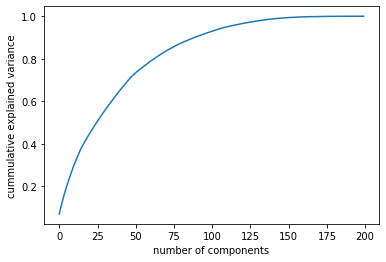

In [9]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cummulative explained variance')
# could potentially remove 50-100 variables

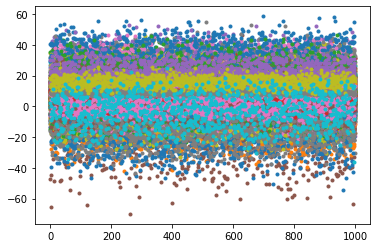

In [10]:
plt.plot(X[:1000], '.')

In [50]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.10, random_state=42)

In [51]:
# check if reasonable split
print(sum(y_train)/len(y_train), sum(y_val)/len(y_val))

0.10029975733929676 0.09463317156722809


In [52]:
clf_rf = RandomForestClassifier(n_jobs=4, random_state=0)
clf_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [53]:
# Since the dataset is imbalanced, it's important to check that the algorithm is not classifying everything as one class
def accuracy(y_true, y_predict):
    TP, FN, TN, FP = 0, 0, 0, 0
    for (i, y) in enumerate(y_predict):
        if y == 1:
            if y_true[i] == 1:
                # true positive
                TP += 1
            elif y_true[i] == 0:
                # false positive
                FP += 1
        elif y == 0:
            if y_true[i] == 1:
                # false negative
                FN += 1
            elif y_true[i] == 0:
                # true negative
                TN += 1
    print("positive accuracy:", TP/(TP + FN))
    print("negative accuracy:", TN/(TN + FP))
    return TP, FN, TN, FP

In [37]:
accuracy(y_val, clf_rf.predict(x_val))
roc_auc_score(y_val, clf_rf.predict(x_val))
# random forrest is shit

positive accuracy: 0.016591251885369532
negative accuracy: 0.9889642125177361


0.5027777322015528

In [18]:
# kfold = model_selection.KFold(n_splits=4, random_state=0)

In [54]:
clf_ab = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_ab.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [55]:
accuracy(y_val, clf_ab.predict(x_val))
roc_auc_score(y_val, clf_ab.predict(x_val))
# adaboost is better than random forrest, but still not good

positive accuracy: 0.22624434389140272
negative accuracy: 0.9862840927006149


0.6062642182960088